# Lab 8 - fMNIST Classification with Dense Neural Networks (using Tensorflow)

## 1. Get the data from Kaggle
- fMNIST data: [link](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

In [202]:
import pandas as pd

# plotting modules
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

import numpy as np

In [203]:
fmnist_df_train = pd.read_csv("data/fashion_mnist/fashion-mnist_train.csv")
fmnist_df_test = pd.read_csv("data/fashion_mnist/fashion-mnist_test.csv")

y_train = fmnist_df_train["label"].to_numpy()
X_train = fmnist_df_train.drop("label", axis=1).to_numpy()

y_test = fmnist_df_test["label"].to_numpy()
X_test = fmnist_df_test.drop("label", axis=1).to_numpy()

## 2. Run Great EDA

### Data Exploration

In [204]:
print(f'Image DType: {type(X_train)}')
print(f'Image Element DType: {type(X_train[0,0])}')
print(f'Label Element DType: {type(y_train[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {X_train.shape}')
print(f'Labels: {y_train.shape}')
print('Test Data:')  # the text images should be a random sample of the overall test set, and hence should have the same type, shape and image-size as the overall train set
print(f'Images: {X_test.shape}')
print(f'Labels: {y_test.shape}')
print('Image Data Range:')
print(f'Min: {X_train.min()}')
print(f'Max: {X_train.max()}')
print('Class Label Range:')
print(f'Min: {y_train.min()}')
print(f'Max: {y_train.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.int64'>
Label Element DType: <class 'numpy.int64'>
**Shapes:**
Train Data:
Images: (60000, 784)
Labels: (60000,)
Test Data:
Images: (10000, 784)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255
Class Label Range:
Min: 0
Max: 9


- The fMNIST dataset consists of 70,000 data (60,000 for train and 10,000 for test), each with 784 features (28 x 28).
- Each data point represents the pixel values of a 28 x 28 image.
- The range of each pixel value is from 0 to 255.
- The target class of the data is ranging from 0 to 9.

### Check the actual values of data 

In [205]:
print(X_train[0])
print(y_train[:10])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4   0
   0   0   0   0  62  61  21  29  23  51 136  61   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  88 201 228 225 255 115  62
 137 255 235 222 255 135   0   0   0   0   0   0   0   0   0   0   0   0
   0  47 252 234 238 224 215 215 229 108 180 207 214 224 231 249 254  45
   0   0   0   0   0   0   0   0   1   0   0 214 222 210 213 224 225 217
 220 254 233 219 221 217 223 221 240 254   0   0   1   0   0   0   1   0
   0   0 128 237 207 224 224 207 216 214 210 208 211 221 208 219 213 226
 211 237 150   0   0   0   0   0   0   2   0   0 237 222 215 207 210 212
 213 206 214 213 214 213 210 215 214 206 199 218 25

### Plot the data as images

In [206]:
def plot_image(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

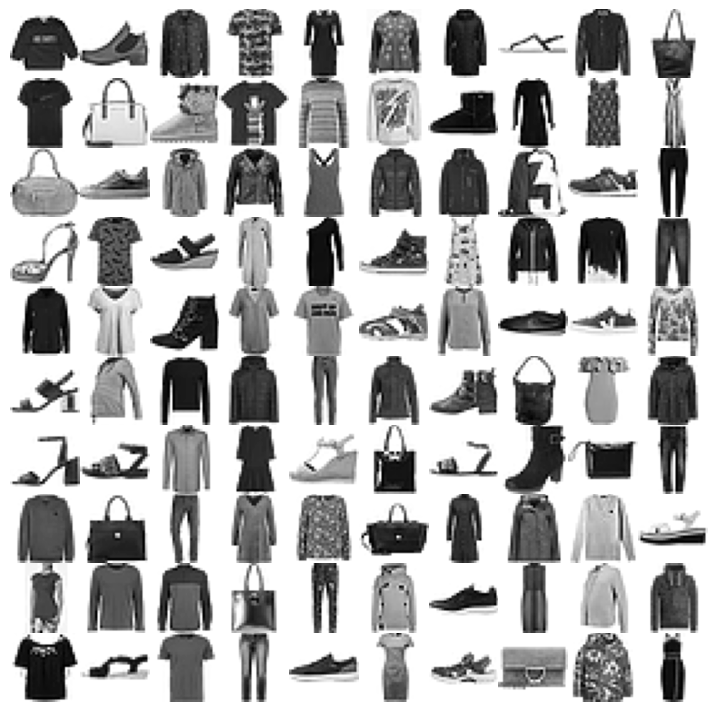

In [207]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X_train[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_image(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [208]:
y_train[:100]

array([2, 9, 6, 0, 3, 4, 4, 5, 4, 8, 0, 8, 9, 0, 2, 2, 9, 3, 3, 3, 8, 7,
       4, 4, 0, 4, 4, 8, 7, 1, 5, 0, 5, 3, 2, 7, 3, 4, 2, 1, 6, 0, 9, 6,
       0, 5, 6, 7, 7, 2, 5, 2, 2, 4, 1, 4, 9, 8, 3, 4, 5, 5, 6, 3, 5, 8,
       5, 9, 8, 1, 2, 8, 1, 3, 6, 8, 3, 4, 2, 5, 0, 2, 6, 8, 1, 2, 7, 6,
       6, 4, 6, 5, 0, 1, 7, 3, 5, 8, 4, 3], dtype=int64)

- The initial 100 items from the training dataset were visualized.
- Upon observation, it is evident that the data comprises items related to fashion, such as shoes, clothing, and bags.
- Class labels are assigned to these categories numerically, ranging from 0 to 9.

### Color Map

To verify the images, they were displayed at different scales.

Text(0.5, 1.0, 'Binary Scale')

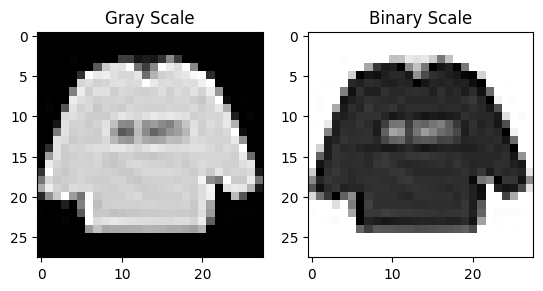

In [209]:
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title('Gray Scale')
plt.subplot(1, 2, 2)
plt.imshow(X_train[0].reshape(28, 28), cmap='binary')
plt.title('Binary Scale')

To inspect the color based on each pixel value, the data are visualized.
- In a grayscale image, it is observed that the closer a pixel value is to 255, the brighter it is, and the closer it is to 0, the darker it becomes.

In [210]:
def visualize_input(i, ax, y):
    img = X_train[i].reshape(28,28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Class no : {y[i]}")
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(img[x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
    ax.set_xticks([])
    ax.set_yticks([])

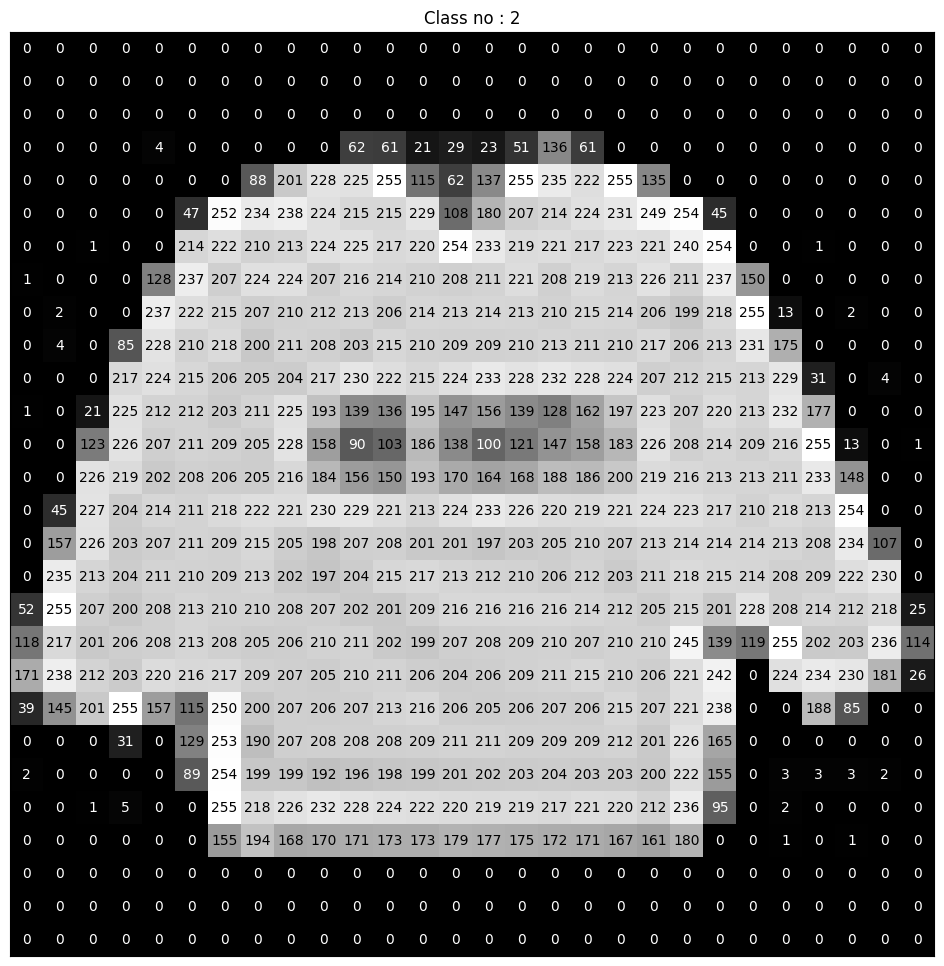

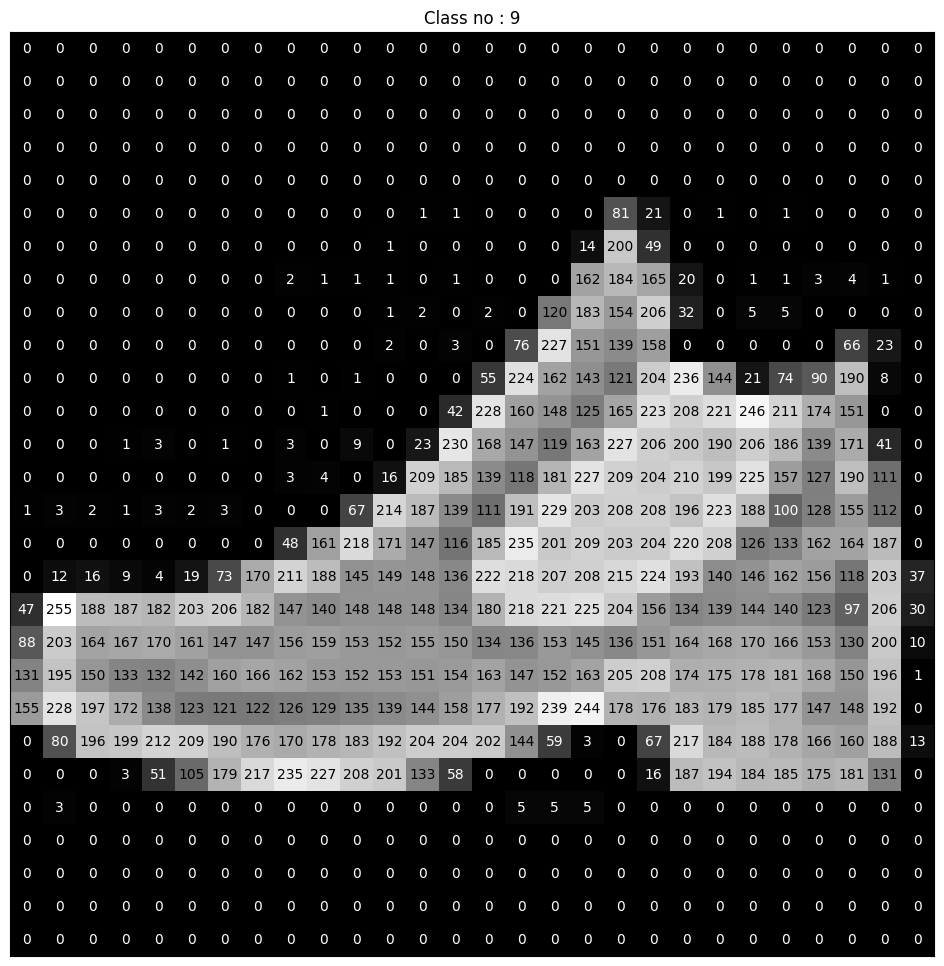

In [211]:
for i in range(2):
    fig = plt.figure(figsize = (12,12)) 
    ax = fig.add_subplot(111)
    visualize_input(i, ax, y_train)

### Pixel Distribution

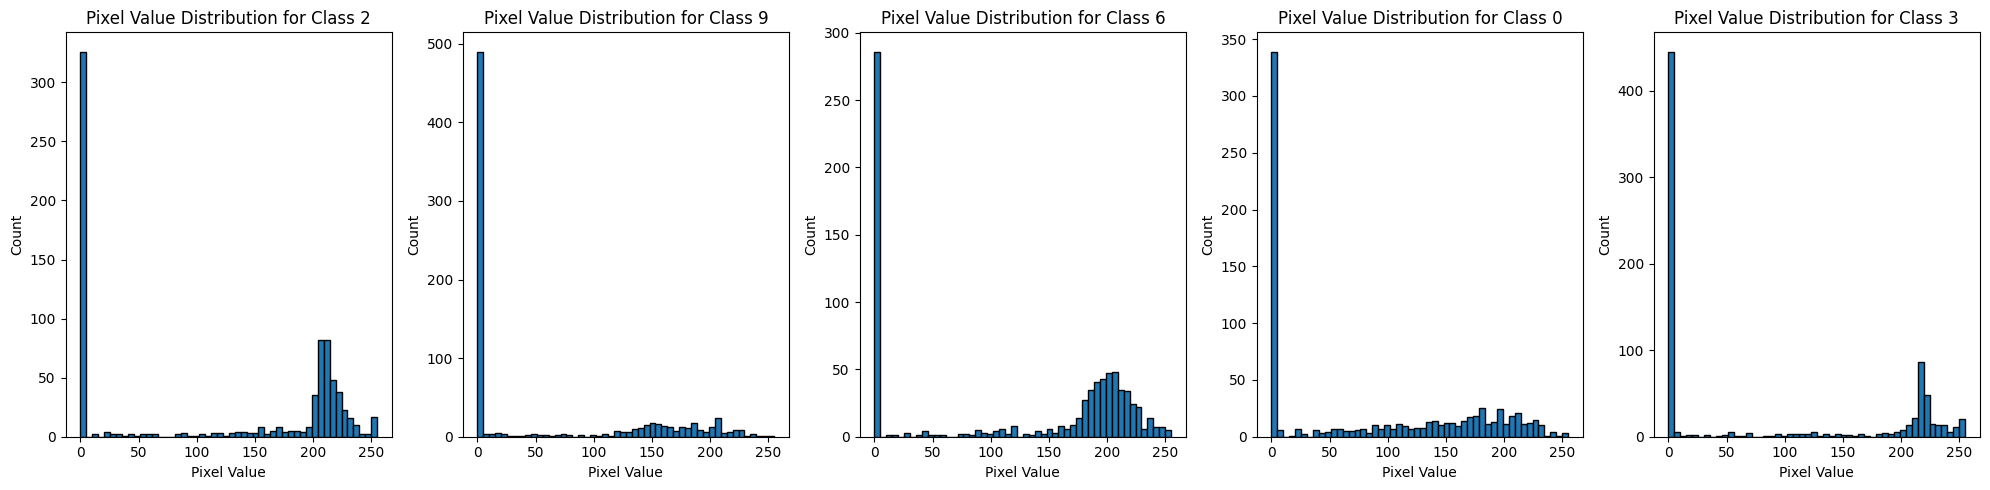

In [212]:
# Plot the distribution of pixel values
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i in range(5):
    plt.sca(axes[i])
    plt.hist(X_train[i], bins=50, edgecolor='black')
    plt.title(f'Pixel Value Distribution for Class {y_train[i]}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

- The pixel value distribution of images across five classes was plotted.
- It was observed that for all class images, the value of pixel 0 is the most frequent, followed by values around 200.
- The majority of the pixels are indicative of the background.

### The Average Image per Class

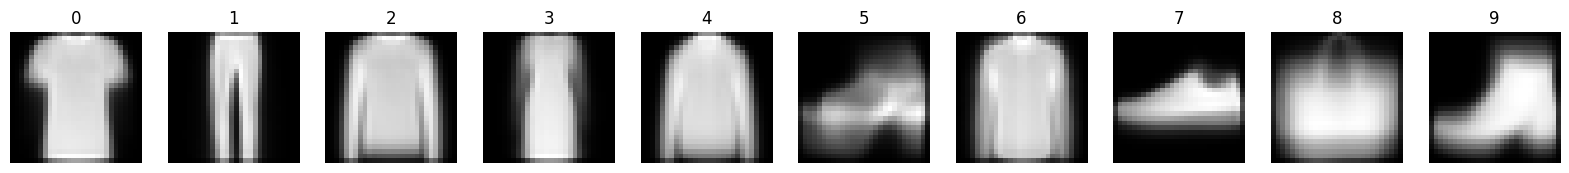

In [213]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for digit in range(10):
    digit_indices = np.where(y_train.astype('int8') == digit)[0]
    avg_image = np.mean(X_train[digit_indices], axis=0).reshape(28, 28)
    axes[digit].imshow(avg_image, cmap='gray')
    axes[digit].set_title(str(digit))
    axes[digit].axis('off')
plt.show()

- The average pixel values for each data point across classes 0 to 9 were calculated and visualized.
- Classes 2, 4, 6, and 5, 7 are not easily distinguishable in the above images.
- According to the Kaggle dataset, each image represents the following:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot
- Reference: https://www.kaggle.com/datasets/zalando-research/fashionmnist/data

### Class Imbalance check


<Axes: xlabel='class', ylabel='count'>

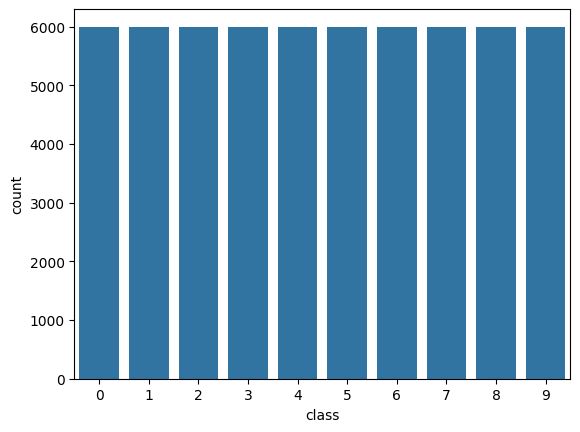

In [214]:
y_values, counts = np.unique(y_train, return_counts=True)
df_y = pd.DataFrame({'class': y_values, 'count': counts})
sns.barplot(df_y, x="class", y="count")

In [215]:
# Count the occurrences of each class
class_counts = np.bincount(y_train)

# Plot a piechart using plotly
fig = px.pie(values=class_counts, names=[str(i) for i in range(10)], title='Percentage of samples per label')
fig.show()

- The bar plot and pie chart above show how data is distributed across each class.
- In the test set, data for each label is evenly distributed, with 6,000 instances for each class from 0 to 9.

## 3. Define and Train a fully-connected feedforward neural network of your choice using Keras and Tensorflow

In [216]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Data Preprocessing

Pixel values range up to 255, but to facilitate efficient training, the data is normalized by dividing by 255.

In [217]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

print(X_train.min())
print(X_train.max())
print(X_train.shape)
print(X_train[0].shape)

0.0
1.0
(60000, 784)
(784,)


### Split Dataset

In [218]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=42)

### Define the model

In [219]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

### Define the Loss Function, Optimizer, Metrics

In [220]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### Train the model

In [221]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5


329/329 [==============================] - 2s 5ms/step - loss: 0.6243 - accuracy: 0.7809
Epoch 2/5
329/329 [==============================] - 2s 5ms/step - loss: 0.4265 - accuracy: 0.8455
Epoch 3/5
329/329 [==============================] - 1s 4ms/step - loss: 0.3711 - accuracy: 0.8640
Epoch 4/5
329/329 [==============================] - 1s 4ms/step - loss: 0.3394 - accuracy: 0.8757
Epoch 5/5
329/329 [==============================] - 1s 5ms/step - loss: 0.3140 - accuracy: 0.8837


## 4. Evaluate the model using the validation dataset

### Predict values using validation data set

In [222]:
y_pred_val = model.predict(X_val)
y_pred_val.shape

563/563 [==============================] - 0s 767us/step


(18000, 10)

### Assign the class witht the highest probability

In [223]:
y_pred_val_class = y_pred_val.argmax(axis=1)
y_pred_val_class

array([7, 8, 8, ..., 2, 7, 4], dtype=int64)

### Confusion Matrix

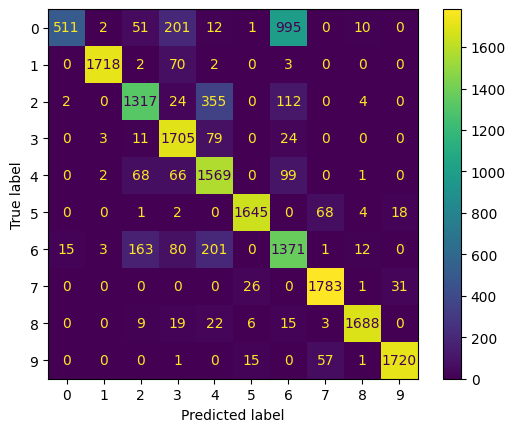

In [224]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred_val_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Accuracy, Precision, Recall, F1-score

In [225]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred_val_class))

              precision    recall  f1-score   support

           0       0.97      0.29      0.44      1783
           1       0.99      0.96      0.98      1795
           2       0.81      0.73      0.77      1814
           3       0.79      0.94      0.85      1822
           4       0.70      0.87      0.78      1805
           5       0.97      0.95      0.96      1738
           6       0.52      0.74      0.61      1846
           7       0.93      0.97      0.95      1841
           8       0.98      0.96      0.97      1762
           9       0.97      0.96      0.97      1794

    accuracy                           0.83     18000
   macro avg       0.86      0.83      0.83     18000
weighted avg       0.86      0.83      0.83     18000



- When evaluated using the validation set, the model demonstrates an accuracy of 0.83, indicating overall good performance.
- Most classes exhibit a precision above 0.9, with classes 2, 3, and 4 showing approximately 0.7 to 0.8.
- Class 6 notably has a lower precision, around 0.52, indicating a significant drop.
- Considering both precision and recall, the f1-score reveals class 0 to have the lowest score at 0.44 due to the lowest recall value.

## 5. Run the model on the test set, and provide clear and relevant conclusions

### Predict values using test data set

In [226]:
y_pred_test = model.predict(X_test)
y_pred_test.shape

  1/313 [..............................] - ETA: 4s

313/313 [==============================] - 0s 832us/step


(10000, 10)

### Assign the class witht the highest probability

In [227]:
y_pred_test_class = y_pred_test.argmax(axis=1)
y_pred_test_class

array([6, 1, 2, ..., 8, 8, 1], dtype=int64)

### Confusion Matrix

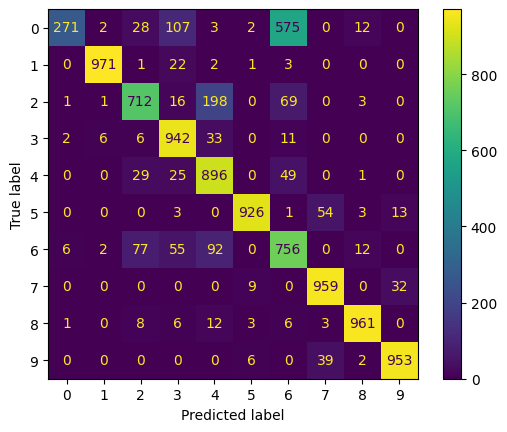

In [229]:
cm = confusion_matrix(y_test, y_pred_test_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Accuracy, Precision, Recall, F1-score

In [230]:
print(classification_report(y_test, y_pred_test_class))

              precision    recall  f1-score   support

           0       0.96      0.27      0.42      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.71      0.77      1000
           3       0.80      0.94      0.87      1000
           4       0.72      0.90      0.80      1000
           5       0.98      0.93      0.95      1000
           6       0.51      0.76      0.61      1000
           7       0.91      0.96      0.93      1000
           8       0.97      0.96      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.83     10000
   macro avg       0.86      0.83      0.82     10000
weighted avg       0.86      0.83      0.82     10000



### Conclusion

1. Accuracy
- This model has an accuracy of 0.83, which means that out of the 10,000 pieces of data in the test set, about 8,300 were successfully classified.

2. Precision
- Most classes exhibit a precision above 0.9, demonstrating good performance.
- In the case of class 6, the precision drops significantly to 0.51 compared to other classes.

3. Recall
- Regarding recall, class 0 has a notably low value of 0.27
- Referencing the confusion matrix, this is largely due to data originally belonging to class 0 being frequently predicted as class 6

4. Cause Analysis
- Upon reviewing images of class 0 and class 6, it's observed that class 0 represents t-shirts, while class 6 represents shirts. 
- The occurrence of short-sleeved shirts in class 6 likely contributes to this confusion

## 6. What if we wanted to increase the precision for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this.

### Precision-recall curve for class 5

In [231]:
from sklearn.metrics import precision_recall_curve

y_scores = y_pred_test
y_scores_5 = y_scores[:, 5]
y_test_5 = (y_test == 5).astype(int)
precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_scores_5)

print(precisions[:5])
print(recalls[:5])
print(thresholds[:5])

[0.1        0.10001    0.10002    0.10003001 0.10004002]
[1. 1. 1. 1. 1.]
[1.30849671e-15 3.69841097e-15 7.54062865e-15 9.86425432e-15
 1.26679825e-14]


In [237]:
idx = (precisions >= 0.98).argmax()
thresholds[idx]

0.4917131

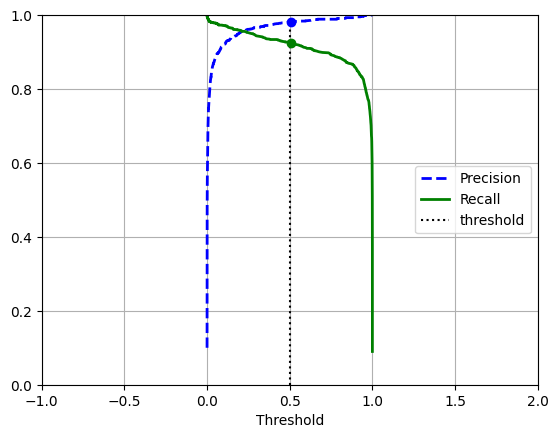

In [238]:
threshold = 0.50
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-1, 2, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

- As observed in the precision-recall graph, increasing the threshold results in higher precision but lower recall, whereas decreasing the threshold has the opposite effect.

### Increase precision for class 5

In [233]:
from sklearn.metrics import precision_score, recall_score

idx_for_99_precision = (precisions >= 0.99).argmax()
threshold_for_99_precision = thresholds[idx_for_99_precision]
print('threshold for 99% precision: ', threshold_for_99_precision)

y_test_pred_99 = (y_scores_5 >= threshold_for_99_precision)
print('precision score: ', precision_score(y_test_5, y_test_pred_99))
print('recall score: ', recall_score(y_test_5, y_test_pred_99))

threshold for 99% precision:  0.78959846
precision score:  0.9910514541387024
recall score:  0.886


- Originally, the precision for class 5 in the model was 0.98.
- To increase the precision to 0.99, the threshold was raised, resulting in precision increasing to 0.99 and recall decreasing from 0.93 to 0.89.

### 7. What if we wanted to increase the recall for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this.

### Increase recall for class 5

In [234]:
from sklearn.metrics import precision_score, recall_score

idx_for_95_recall = (recalls >= 0.95).argmin() - 1
threshold_for_95_recall = thresholds[idx_for_95_recall]
print('threshold for 95% recall: ', threshold_for_95_recall)

y_test_pred_95 = (y_scores_5 >= threshold_for_95_recall)
print('precision score: ', precision_score(y_test_5, y_test_pred_95))
print('recall score: ', recall_score(y_test_5, y_test_pred_95))

threshold for 95% recall:  0.27713662
precision score:  0.9644670050761421
recall score:  0.95


- Originally, the recall for class 5 was 0.93.
- In an effort to increase recall, the threshold was lowered, which resulted in an increase in recall to 0.95 and a decrease in precision from 0.98 to 0.96.